### Lets Build a line plot about bird wingspan values

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('birds.csv')
birds.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_992\501273408.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


### Let's start by plotting some of the numeric data using a basic line plot. Suppose you wanted a view of the maximum wingspan for these interesting birds.

<Axes: >

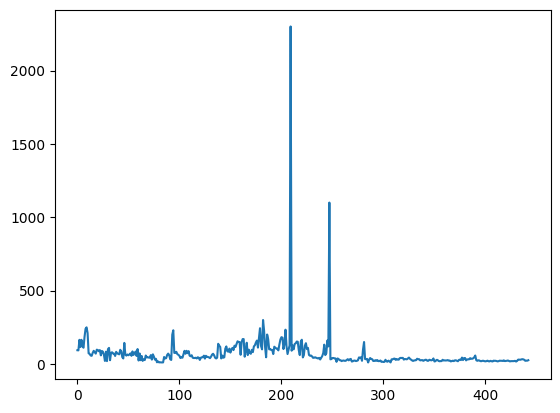

In [3]:
wingspan = birds['MaxWingspan'] 
wingspan.plot()

### What do you notice immediately? There seems to be at least one outlier - that's quite a wingspan! A 2300 centimeter wingspan equals 23 meters - are there Pterodactyls roaming Minnesota? Let's investigate.
### While you could do a quick sort in Excel to find those outliers, which are probably typos, continue the visualization process by working from within the plot.

### Add labels to the x-axis to show what kind of birds are in question:

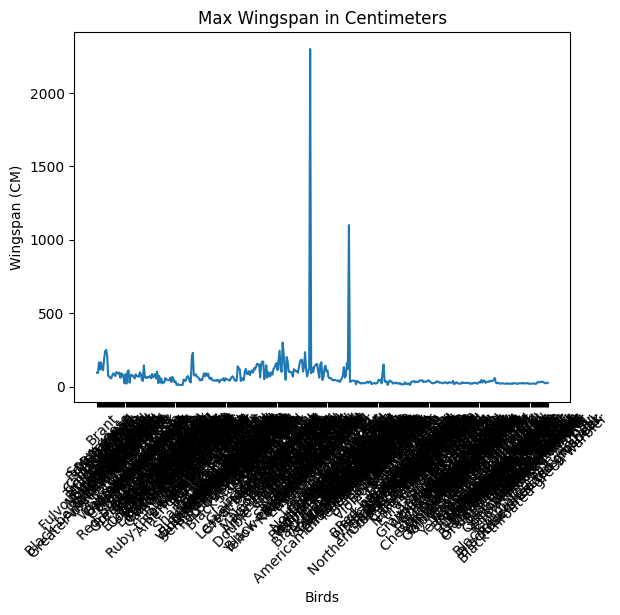

In [4]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=45)
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

### Even with the rotation of the labels set to 45 degrees, there are too many to read. Let's try a different strategy: label only those outliers and set the labels within the chart. You can use a scatter chart to make more room for the labeling:

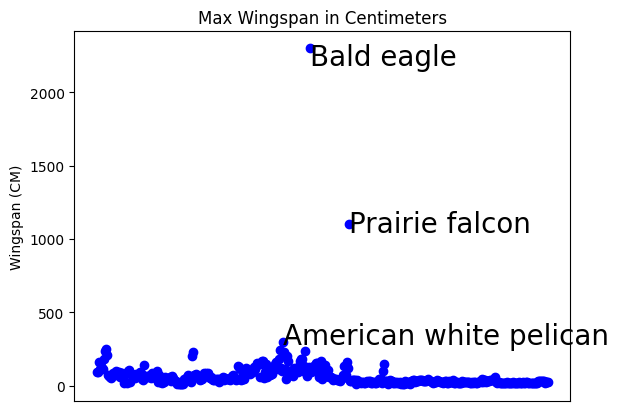

In [5]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if birds['MaxWingspan'][i] > 250:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=20)
    
plt.show()

### What's going on here? we've used tick_params to hide the bottom labels and then created a loop over our birds dataset. Plotting the chart with small round blue dots by using bo, we checked for any bird with a maximum wingspan over 500 and displayed their label next to the dot if so. We offset the labels a little on the y axis (y * (1 - 0.05)) and used the bird name as a label.

## Filtering our data

Both the Bald Eagle and the Prairie Falcon, while probably very large birds, appear to be mislabeled, with an extra 0 added to their maximum wingspan. It's unlikely that you'll meet a Bald Eagle with a 25 meter wingspan, but if so, please let us know! Let's create a new dataframe without those two outliers:

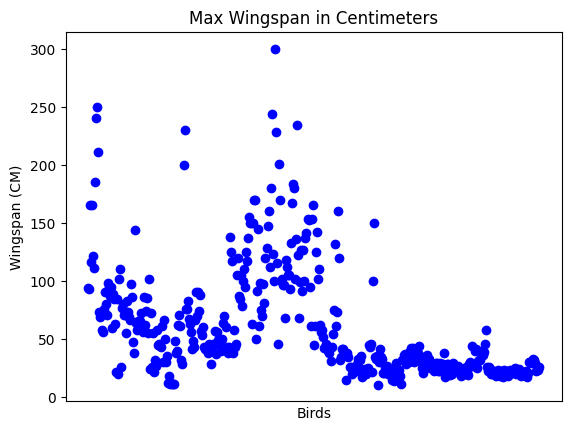

In [6]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()
    


### Now, we have Filtered out the outliers, the dataset is more cleaner and understandable. 
### lets discover more about these birds

<Axes: title={'center': 'Birds of Minnesota'}, xlabel='Order'>

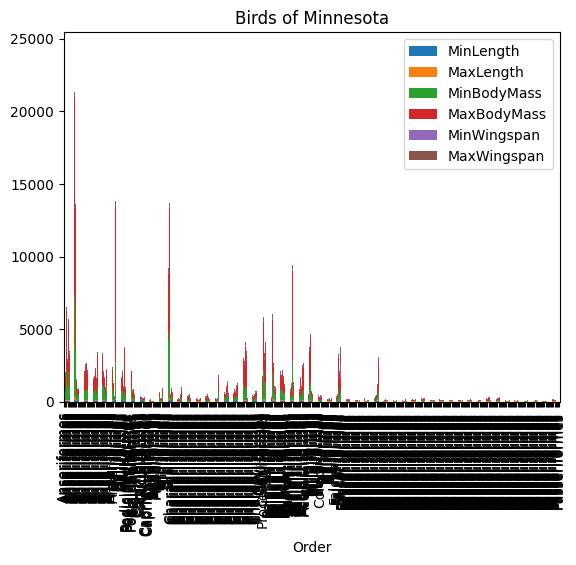

In [7]:
birds.plot(x='Order',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')

### The above bar chart is unreadable because we have too much ungrouped data, so lets look at the lenghts of birds based on their order

<Axes: >

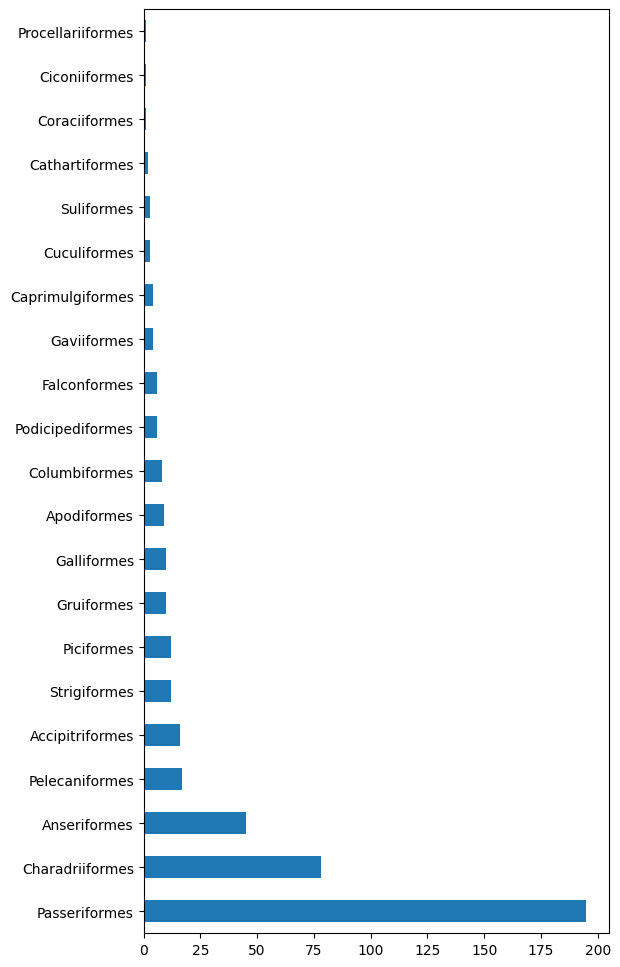

In [8]:
order_count = birds.value_counts(birds['Order'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
order_count.plot.barh()

### This bar chart shows a good view of the number of birds in each Order. In a blink of an eye, you see that the largest number of birds in this region are in the Passeriformes order

## Comparing Data

### Let's try different comparisons of grouped data by creating new axes.Lets  try a comparison of the MaxLength of a bird, based on its order:

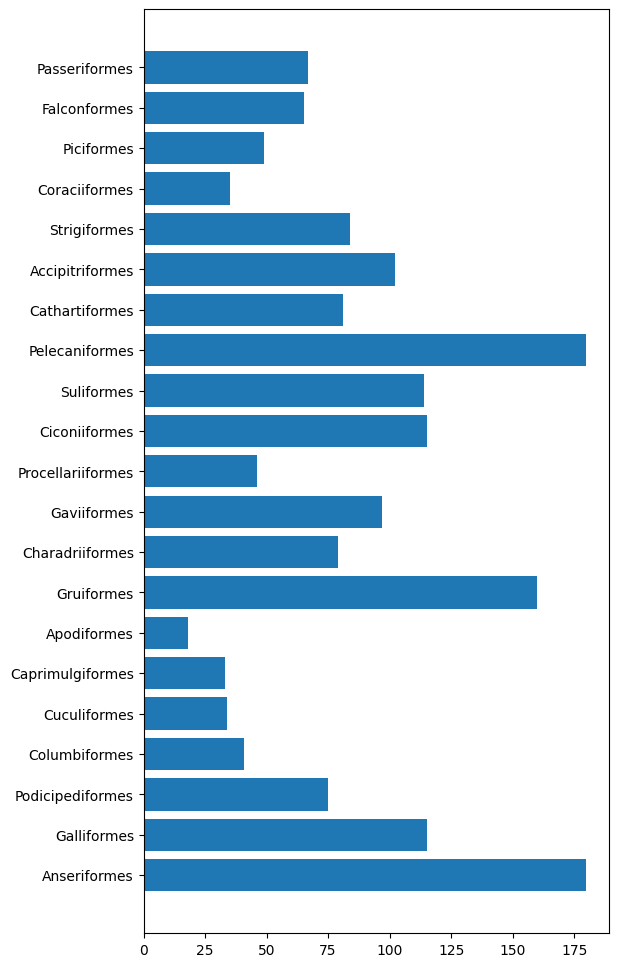

In [9]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Order'], width=maxlength)
plt.rcParams['figure.figsize'] = [10, 18]
plt.show()

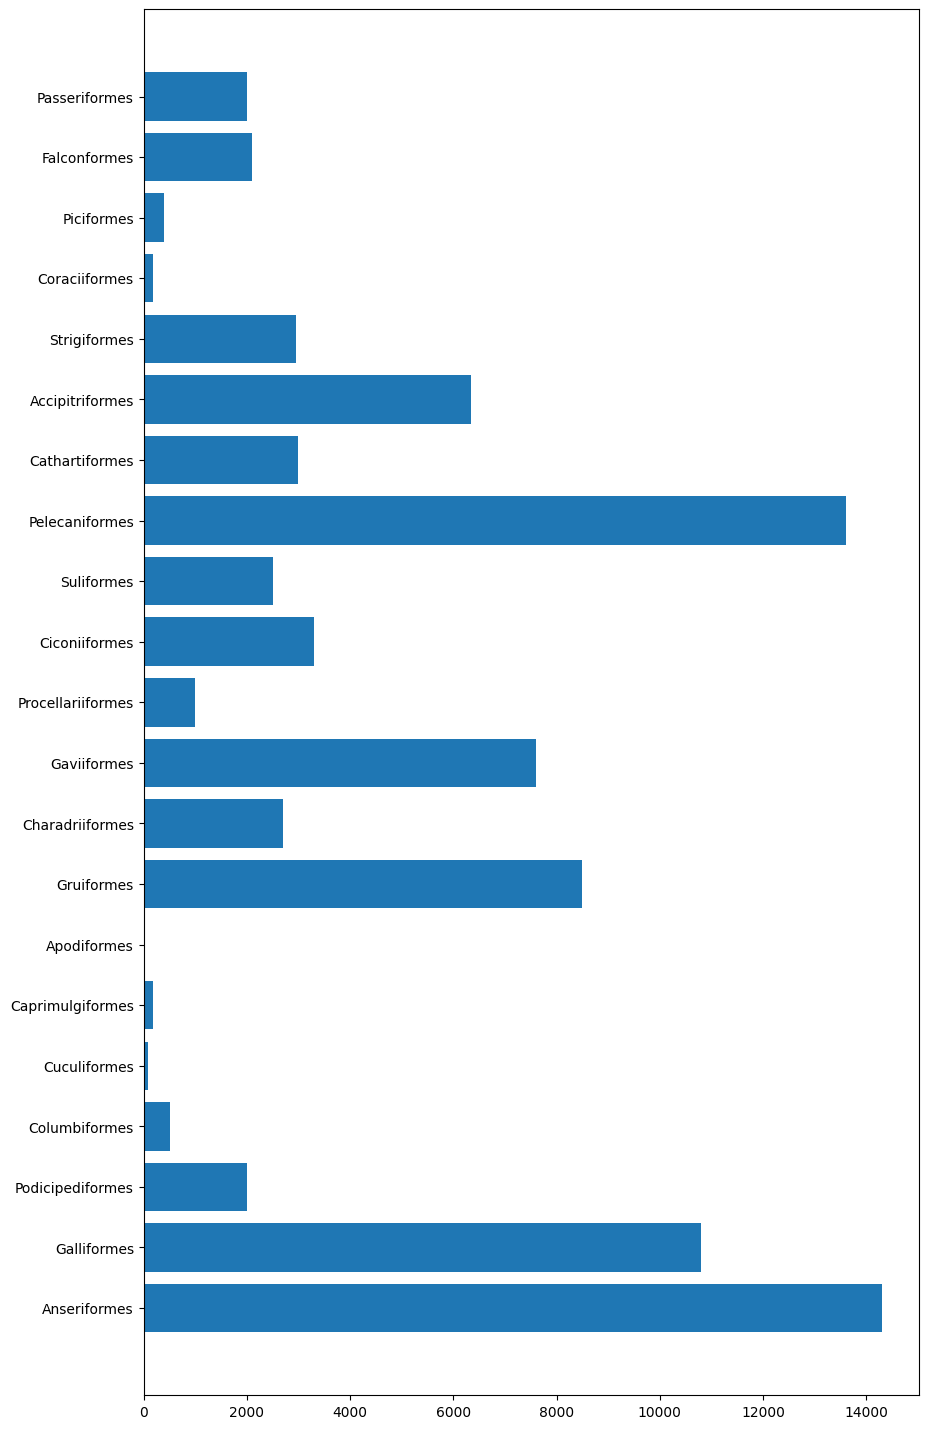

In [10]:
maxBody = birds['MaxBodyMass']
plt.barh(y=birds['Order'], width=maxBody)
plt.rcParams['figure.figsize'] = [10, 18]
plt.show()

### We can create more interesting visualizations of bar charts by superimposing data. Let's superimpose Minimum and Maximum Body Mass on a given bird Order

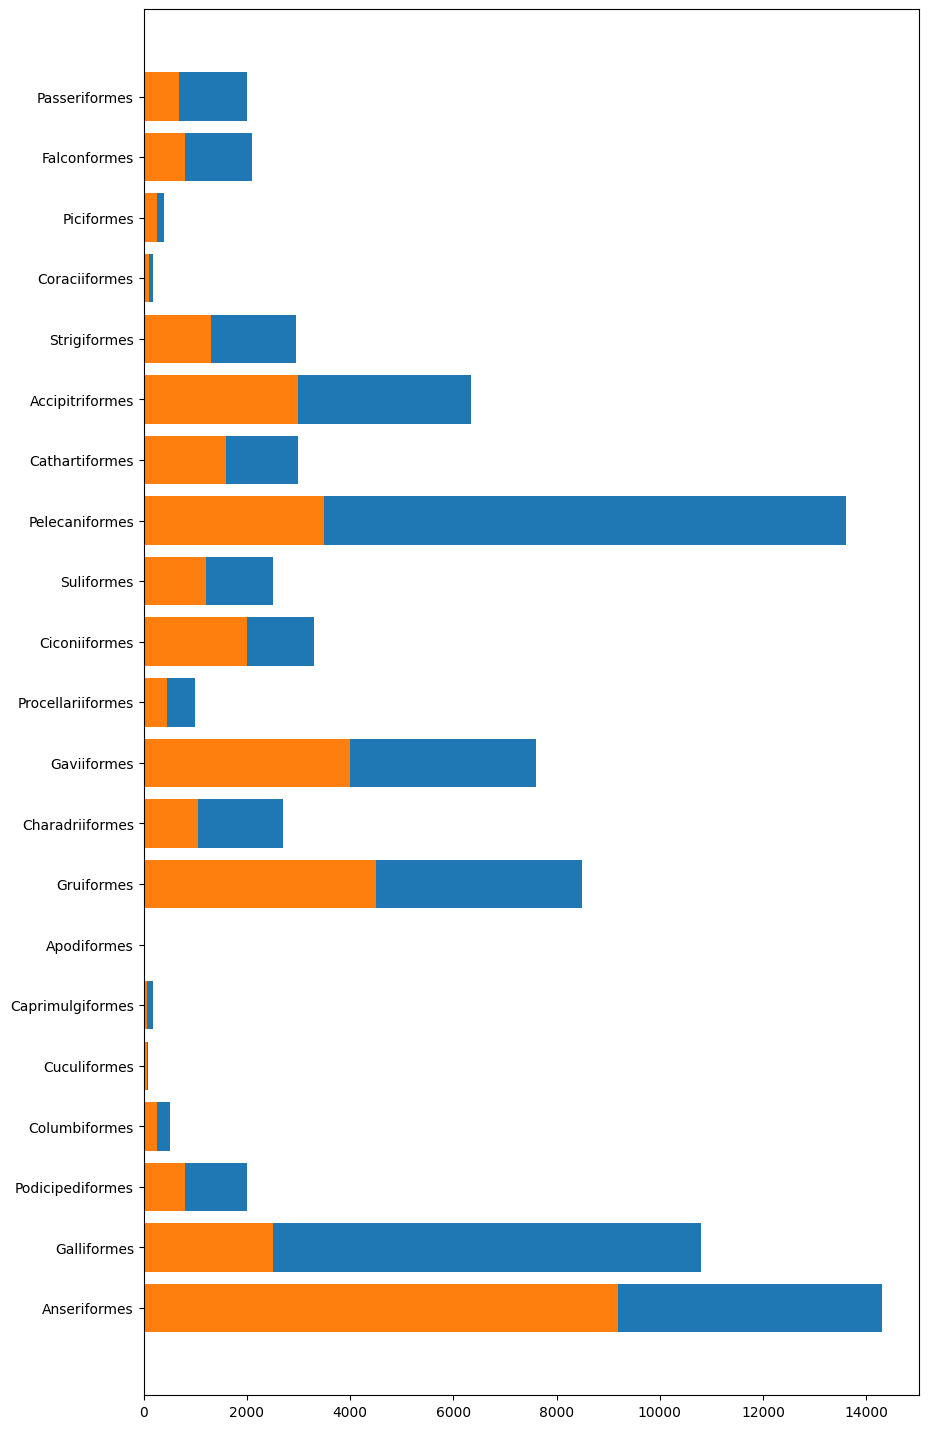

In [11]:
minBody = birds['MinBodyMass']
maxBody = birds['MaxBodyMass']
order = birds['Order']

plt.barh(order, maxBody)
plt.barh(order, minBody)

plt.show()

### In this plot, you can see the range per bird order of the Minimum Body Mass and Maximum Body Mass. You can safely say that, given this data, the bigger the bird, the larger its Body Mass range. Fascinating!

### Lets try ploting using Scatter plot

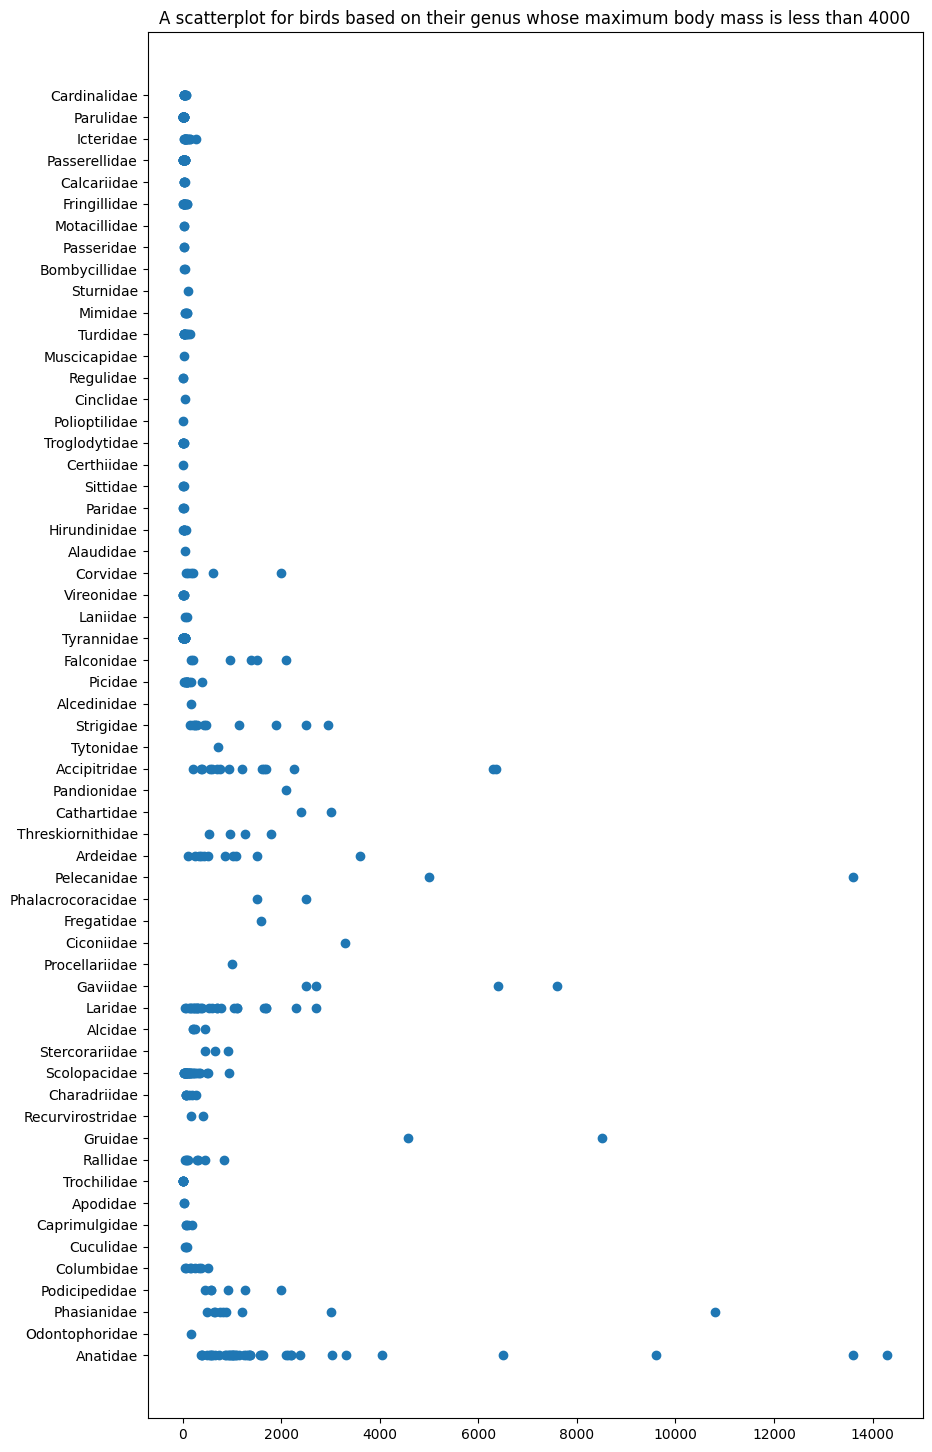

In [14]:
x = birds['MaxBodyMass']
y = birds['Family']
plt.scatter(x,y )
plt.title("A scatterplot for birds based on their genus whose maximum body mass is less than 4000")
plt.show()

In [15]:
Anseriformes = birds[birds['Order'] =='Anseriformes']
Anseriformes

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0
5,Brant,Branta bernicla,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,55.0,66.0,880.0,2200.0,206.0,121.0
6,Cackling goose,Branta hutchinsii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,63.0,65.0,1398.0,2380.0,108.0,111.0
7,Canada goose,Branta canadensis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Branta,LC,75.0,110.0,2600.0,6500.0,127.0,185.0
8,Mute swan,Cygnus olor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Cygnus,LC,125.0,170.0,9200.0,14300.0,200.0,240.0
9,Trumpeter swan,Cygnus buccinator,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Cygnus,LC,138.0,180.0,7000.0,13600.0,185.0,250.0
